In [2]:
from astropy.io import fits
import numpy as np
import matplotlib.pyplot as plt

Read the file using astropy.io.fits module and store the returned object

In [3]:
hdulist = fits.open("/home/ingydar/ss21-astronomy-tasks/data/gll_iem_v02_P6_V11_DIFFUSE.fit")

Find the number of HDUs present in this FITS file.

In [4]:
len(hdulist)

2

Read the primary header and make a list containing the answer to the following questions.

    What is the length of axis 3?
    What is the axis 3 supposed to be?
    What are the units of axis 3?
    What is the name of the telescope?
    What is the name of the observer?


In [5]:
hdu = hdulist[0]
hdu.data.shape

ans_lst = [hdu.data.shape[0], 'photon energy spectra', 'MeV', 'GLAST', 'MICHELSON']
ans_lst

[30, 'photon energy spectra', 'MeV', 'GLAST', 'MICHELSON']

Extract the data from the primary HDU. For the first slice of this data, find the maximum and minimum pixel value along with the standard deviation of this data.

In [6]:
img_data = hdu.data

maxpxl = max(img_data[0].flatten())
minpxl = min(img_data[0].flatten())
stdpxl = np.std(img_data[0].flatten())

print(maxpxl,minpxl,stdpxl)

4.5921523e-05 7.027717e-08 1.3843595e-06


Look into the arguments of the pyplot function imshow. Use the pixel values obtained above to limit the colour scaling of imshow. Use cmap='gray' while plotting the image. (Make the plot look nice by appropriately choosing the figure size and using labels.

Text(0.5, 1.0, 'slice:1')

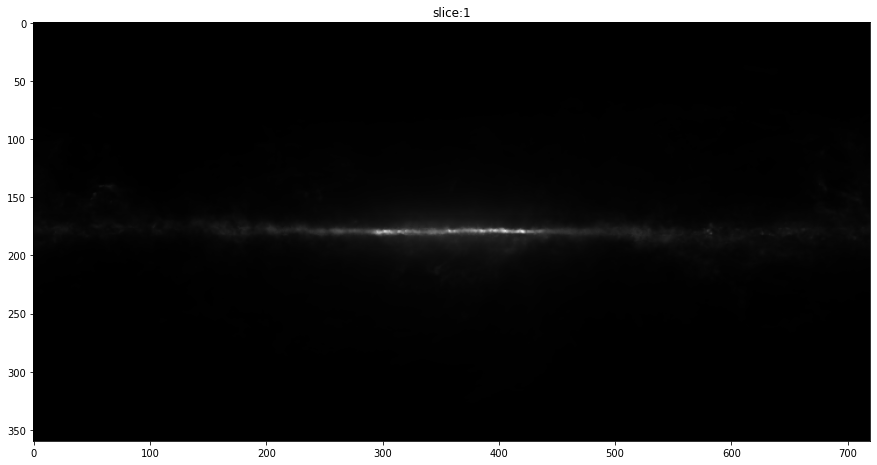

In [7]:
plt.figure(figsize = (15,20))
plt.imshow(img_data[0], cmap = 'gray', vmin = minpxl, vmax = maxpxl)
plt.title('slice:1')

'Stack' every 5th slice (slice 5, 10, 15...) of the original data. This can be done by simply summing the slices (arrays) together. Plot this new dataset by repeating task 5 and 6.

Text(0.5, 1.0, 'slice:5,10...30')

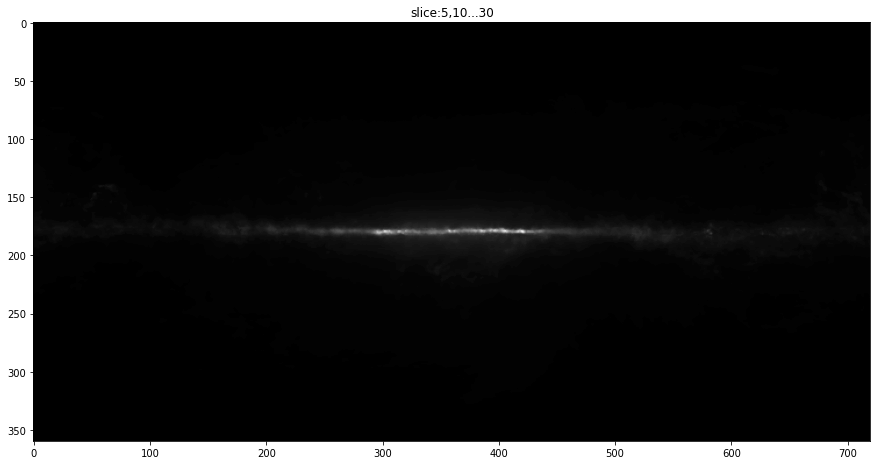

In [8]:
r = 4
i = 0
while i < 30:
    r += img_data[i,:,:]
    i+=5
    
maxpxl_f = max(r.flatten())
minpxl_f = min(r.flatten())
stdpxl_f = np.std(r.flatten())
plt.figure(figsize = (15,20))
plt.imshow(r, cmap = 'gray', vmin = minpxl_f, vmax = maxpxl_f)
plt.title('slice:5,10...30')

Create a function that plots the 'Altitude' (AltAz coordinate system) of a celestial object 12 hours after a given time. Assume you are located at IITM (like I did during the session) and also that the object's coordinates are known in some other coordinate system. You should need only two arguments, the coordinates of the object and the desired time of observation

In [12]:
def altitude(coords, time):
    from astropy import units as u
    from astropy.coordinates import SkyCoord, EarthLocation, AltAz
    from astropy.time import Time
    time_arr = [time, time+12*u.hour]
    iitm = EarthLocation(lat=12.992*u.deg, lon=80.234*u.deg, height=50*u.m)
    coords_altas = coords.transform_to(AltAz(location = iitm, obstime = time_arr))
    return coords_altas.alt  